## BUILDING A MOVIE RECOMMENDATION SYSTEM 

Group Members:

1. Mwangi Wambugu

2. Grace Mutuku

3. Rony Muriithi 

4. Esther Nyawera

5. John Kioko

6. Heri Kimotho

7. Peter Otieno


### INTRODUCTION

#### MOVIE INDUSTRY OVERVIEW
The film industry, a global juggernaut, annually amasses billions in revenue. As per Statista, in 2019 alone, the global box office accumulated a staggering $42.5 billion.
Film production is the creative hub where movies, TV shows, and other visual content come to life, involving stakeholders such as studios, independent producers, and streaming platforms. 
The distribution segment markets and transports these creations to theaters, streaming services, and other outlets. Exhibition refers to the screening of movies and TV shows in cinemas
Movies possess a universal charm, forging connections among individuals from diverse backgrounds. Despite this collective appeal, our personal cinematic tastes exhibit uniqueness, spanning various genres such as thrillers, romance, or sci-fi, and often centering around preferred actors and directors.

#### STREAMING SERVICES INDUSTRY OVERVIEW
Streaming services deliver digital content, including movies, TV shows, documentaries, and original productions, directly to users over the internet. Streaming services have expanded globally, making content accessible to audiences worldwide. 
Streaming platforms often provide personalized recommendations based on user preferences and viewing history. 
Examples of widely known streaming platforms include:
1. Netflix
2. Hulu
3.Amazon Prime Video
4.Showmax
5.Disney+

### BUSINESS PROBLEM

In the world of streaming services, with the rise in users, competition among streaming services is at an all time high. With a high demand in content, the streaming services need to keep up with growing tastes in the consumer base and they need to push content that is relevant and up to their consumers standards.

Filamu Streaming Services aims to stay competitive in this industry by utilizing the data gotten from GroupLens research lab at the University of Minnesota to build a better and more advanced recommendation system.

Crafting a universal formula for movies that would captivate every individual proves challenging; however, through meticulous analysis of user data and movie-related data,valuable insights are extracted so as to provide users with movie recommendations that would best suit their preferences.


### OBJECTIVES

1. To analyse the data and find the most frequently watched movies.
2. To analyse the data and find the most frequently watched genres based on the data provided. 



### OVERVIEW
1. Importing Libraries and Loading Data
2. Data Understanding
3. Exploratory Data Analysis
4. Modeling




### 1. IMPORTING LIBRARIES AND LOADING DATA

In [1]:
# Importing the relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from surprise import Reader, Dataset
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_and_join_csv(file_path_1, file_path_2):
    # Load CSV files into Pandas DataFrames
    movies = pd.read_csv(file_path_1)
    ratings = pd.read_csv(file_path_2)
        
    # Perform inner joins to combine the datasets based on common column movieId
    movies_ratings_df = pd.merge(movies, ratings, on='movieId', how='inner')
      
    return movies_ratings_df

# Replace  with your actual file paths
movie_rating_df = load_and_join_csv("ml-latest-small/movies.csv", "ml-latest-small/ratings.csv")

# Display the resulting dataset
movie_rating_df

movieId                                      title  \
0             1                           Toy Story (1995)   
1             1                           Toy Story (1995)   
2             1                           Toy Story (1995)   
3             1                           Toy Story (1995)   
4             1                           Toy Story (1995)   
...         ...                                        ...   
100831   193581  Black Butler: Book of the Atlantic (2017)   
100832   193583               No Game No Life: Zero (2017)   
100833   193585                               Flint (2017)   
100834   193587        Bungo Stray Dogs: Dead Apple (2018)   
100835   193609        Andrew Dice Clay: Dice Rules (1991)   

                                             genres  userId  rating  \
0       Adventure|Animation|Children|Comedy|Fantasy       1     4.0   
1       Adventure|Animation|Children|Comedy|Fantasy       5     4.0   
2       Adventure|Animation|Children|Comedy|Fantasy       7     4.5   
3       Adventure|Animation|Children|Comedy|Fantasy      15     2.5   
4       Adventure|Animation|Children|Comedy|Fantasy      17     4.5   
...                                             ...     ...     ...   
100831              Action|Animation|Comedy|Fantasy     184     4.0   
100832                     Animation|Comedy|Fantasy     184     3.5   
100833                                        Drama     184     3.5   
100834                             Action|Animation     184     3.5   
100835                                       Comedy     331     4.0   

         timestamp  
0        964982703  
1        847434962  
2       1106635946  
3       1510577970  
4       1305696483  
...            ...  
100831  1537109082  
100832  1537109545  
100833  1537109805  
100834  1537110021  
100835  1537157606  

[100836 rows x 6 columns]

This function(above) is designed to load two CSV files containing movie information and ratings, respectively, into Pandas DataFrames. It then performs an inner join on the 'movieId' column to combine the datasets into a single DataFrame, merging the movie information with corresponding ratings. The resulting DataFrame, `movies_ratings_df`, is returned.

### 2. DATA UNDERSTANDING AND EDA

The dataset contains 6 columns and 100,836 entries. The 6 columns are `movieId`, `title`, `genres`, `userId`, `rating` and `timestamp`

- **movieId**: an identifier for movies used by <https://movielens.org>.
- **title**: name of the movie imported from <https://www.themoviedb.org/>. Includes year of release.
- **genres**: Different categories or types of movies. Each movie can be associated with one or more genres, indicating the main themes or styles of the film.
- **userId**: represents the unique identifier for a user in the dataset.
- **rating**: a numerical value, on a scale of 0.5-5, assigned by a user to express their preference or opinion about a particular movie.
- **timestamp**: represents the date and time when a user interaction with a movie took place.


A brief statistical summary below of the numerical data provides insight into the distribution of the data by providing an overview of its central tendency and spread. In data ananlsis we look at the different components that make up the dataset. The insight will greatly inform the modelling. For our analysis we will start by looking for information of the structure and distribution of the dataset

In [3]:
class DataUnderstanding:
    def __init__(self, df):
        self.df = df

    def examine_data(self):
        print("----------------------------Details about the data----------------------------\n ")
        print("----------------------------Shape of the dataset---------------------------- ")
        print(f"The dataset is a DataFrame with {self.df.shape[0]} rows and {self.df.shape[1]} columns\n")
        print("----------------------------Columns of the dataset---------------------------- ")
        print(self.df.columns.to_list())
        display(self.df.columns)
        print("---------------------------- First 5 records of the dataset---------------------------- ")
        display(self.df.head())
        # Display information about the dataset
        print("\n----------------------------Data information ----------------------------")
        display(self.df.info())
        print("\n----------------------------Null Values ----------------------------")
        display(self.df.isnull().sum())
        print("\n----------------------------Duplicate Values ----------------------------")
        print(self.df.duplicated().sum(), 'duplicate values')
        display(self.df.describe())
        print('-------------Data Details---------------')
        print(f'Number of unique users:', movie_rating_df.userId.nunique())
        print(f'Number of unique movies:', movie_rating_df.movieId.nunique())

# Instantiate the DataUnderstanding class
data_understanding = DataUnderstanding(movie_rating_df)

# Replace "movie_rating_df" with your actual dataframe
data_understanding.examine_data()


----------------------------Details about the data----------------------------
 
----------------------------Shape of the dataset---------------------------- 
The dataset is a DataFrame with 100836 rows and 6 columns

----------------------------Columns of the dataset---------------------------- 
['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp']


Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

---------------------------- First 5 records of the dataset---------------------------- 


movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating   timestamp  
0       1     4.0   964982703  
1       5     4.0   847434962  
2       7     4.5  1106635946  
3      15     2.5  1510577970  
4      17     4.5  1305696483


----------------------------Data information ----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


None


----------------------------Null Values ----------------------------


movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64


----------------------------Duplicate Values ----------------------------
0 duplicate values


movieId         userId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean    19435.295718     326.127564       3.501557  1.205946e+09
std     35530.987199     182.618491       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%      1199.000000     177.000000       3.000000  1.019124e+09
50%      2991.000000     325.000000       3.500000  1.186087e+09
75%      8122.000000     477.000000       4.000000  1.435994e+09
max    193609.000000     610.000000       5.000000  1.537799e+09

-------------Data Details---------------
Number of unique users: 610
Number of unique movies: 9724


The `examine_data` function serves the purpose of providing a comprehensive overview of a given DataFrame (df). The function prints and displays key details and insights about the dataset. The information presented includes the shape of the dataset, column names, the initial records, data types, null values, and the count of duplicate values.

### 3. DATA ANALYSIS


In [4]:
class DataAnalyzer(DataUnderstanding):
    def __init__(self, df):
        self.df = df
    
    # A function to create plots
    def create_plots(df, plot_type, columns_to_plot, y = None):
        if plot_type == 'count_plot':
            plt.figure(figsize=(12,8))
            sns.countplot(data=df, x=columns_to_plot)
            plt.title(f'Distribution of movie {columns_to_plot}')
            plt.xticks(rotation=90)
            plt.show()
        elif plot_type == 'bar_plot1':
            plt.figure(figsize=(12, 7))
            sns.barplot(columns_to_plot.index, columns_to_plot.values)
            plt.title('Top 10 most frequently rated movies')
            plt.xlabel('Movie tile')
            plt.xticks(rotation=90)
            plt.ylabel('Count')
            plt.show()
        elif plot_type == 'bar_plot2':
            plt.figure(figsize=(12, 7))
            sns.barplot(columns_to_plot.index, columns_to_plot.values)
            plt.title('Top 10 most frequently rated movies and their average ratings')
            plt.xlabel('Movie tile')
            plt.xticks(rotation=90)
            plt.ylabel('Average Rating')
            plt.show()
    def splitting_string(df):
        df['genres'] = df['genres'].apply(lambda x: x.split('|'))
        from collections import Counter
        genre_frequency = Counter(g for genres in df['genres'] for g in genres)
        return genre_frequency
    
    def explode_data(df):
        exploded_genres_df = movie_rating_df.copy()
        exploded_genres_df = exploded_genres_df.explode('genres')
        return exploded_genres_df
    
    def bar_plot(x, y, data):
        plt.figure(figsize=(12,6))
        sns.barplot(x=x, y=y, data=data)
        plt.title('Genres and their average ratings')
        plt.xlabel(f'{x}')
        plt.xticks(rotation=90)
        plt.ylabel(f'{y}')
        plt.show()

    def count_plot(df):
        plt.figure(figsize=(23,10))
        sns.countplot(data=exploded_genres_df, x='genres', hue='rating')
        plt.title(f'Distribution of rating per genre')
        plt.show()
        
    def sort_movie_ratings(movie, order):
        mean_rating = movie.groupby('title')[['rating']].mean()
        mean_rating_sorted = mean_rating['rating'].sort_values(ascending=False)
        if order == 'top':
            ranked_movies = mean_rating_sorted.head(20)
        elif order == 'bottom':
            ranked_movies = mean_rating_sorted.tail(20)
        return ranked_movies
        print("......The top 20 highest rated movies........\n", sort_movie_ratings(movie_rating_df, 'top'))
        print("\n.....The bottom 20 lowest rated movies....\n", sort_movie_ratings(movie_rating_df, 'bottom'))

#### UNIVARIATE ANALYSIS

After the initial analysis we jump right into plotting the different columns in the dataset to see the distribution. We will do this by first doing a univariate analysis which will be looking at the distributions of individual columns. The columns we have singled out are: rating, title.

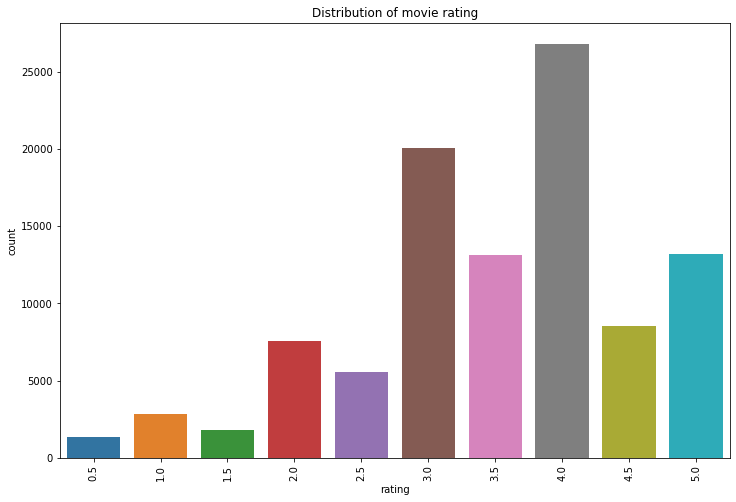

In [5]:
DataAnalyzer.create_plots(movie_rating_df, 'count_plot', 'rating')

The distribution of ratings is right-skewed, meaning there are more movies with higher ratings than lower ratings. 

The most frequent rating is 4.0, followed by 3.0 and 5.

This indicates that most users are having a good user experience so far with the current recommendations. The next step is would be to plot a graph indicating the most popular genres. 

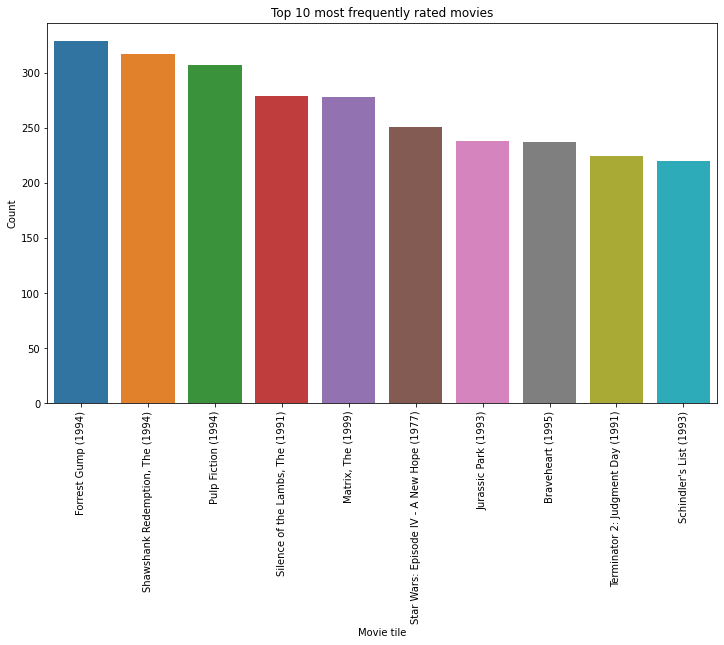

In [6]:
top_10_views = movie_rating_df['title'].value_counts().head(10)
DataAnalyzer.create_plots(movie_rating_df, 'bar_plot1', top_10_views)

The most frequently rated movies are Forrest Gump (1994) and Shawshank Redemption (1994) respectively, with over 300 ratings.

The top 10 includes a mix of genres, including drama, comedy, action, thriller, and science fiction.

In [7]:
DataAnalyzer.splitting_string(movie_rating_df)

Counter({'Adventure': 24161,
         'Animation': 6988,
         'Children': 9208,
         'Comedy': 39053,
         'Fantasy': 11834,
         'Romance': 18124,
         'Drama': 41928,
         'Action': 30635,
         'Crime': 16681,
         'Thriller': 26452,
         'Horror': 7291,
         'Mystery': 7674,
         'Sci-Fi': 17243,
         'War': 4859,
         'Musical': 4138,
         'Documentary': 1219,
         'IMAX': 4145,
         'Western': 1930,
         'Film-Noir': 870,
         '(no genres listed)': 47})

The most prevalent genres include 'Comedy' (39,053 occurrences), 'Drama' (41,928 occurrences), and 'Action' (30,635 occurrences), suggesting a significant presence of these genres in the dataset.

Conversely, genres such as 'Documentary' and 'IMAX' have considerably fewer occurrences, indicating a lower representation of these genres in the dataset.

Next, we create a copy of the dataset to preserve the original dataset to ensure reproducibility and easy testing and debugging.After which we join all the columns into a single dataset so we can start our univariate analysis.

In [8]:
exploded_genres_df = DataAnalyzer.explode_data(movie_rating_df)

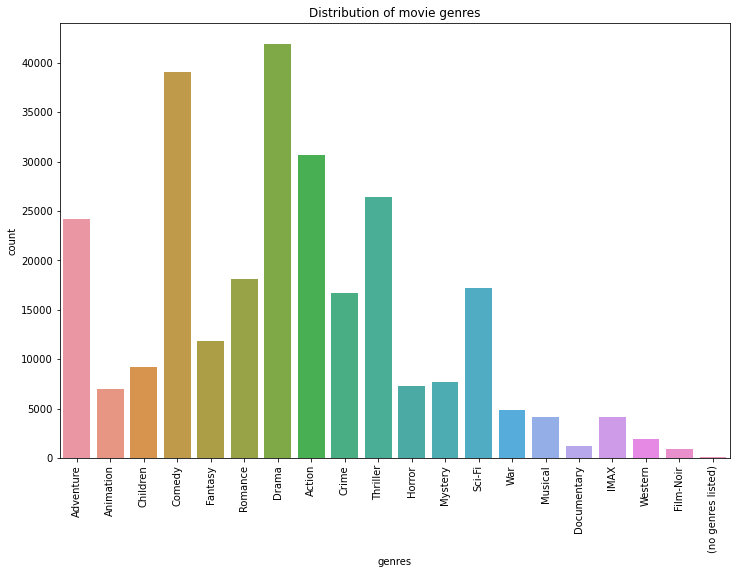

In [9]:
DataAnalyzer.create_plots(exploded_genres_df, 'count_plot', 'genres')

Analyzing the bar chart data, it is evident that 'Drama' stands out with 41,928 occurrences, followed closely by 'Comedy' with 39,053 occurrences, and 'Action' with 30,635 occurrences in the dataset. 

This distribution highlights the substantial presence of these genres, indicating their popularity among the collected movies. 

Conversely, genres such as 'Documentary' and 'IMAX' exhibit considerably fewer occurrences, suggesting a comparatively lower representation in the dataset.

#### BIVARIATE DATA ANALYSIS

Bivariate analysis is used to explore the relationship between two variables. It involves the simultaneous analysis of two variables to understand the patterns of their variation, co-variation, and potential relationships. The primary goal of bivariate analysis is to uncover patterns, associations, and dependencies between the two variables being studied. 

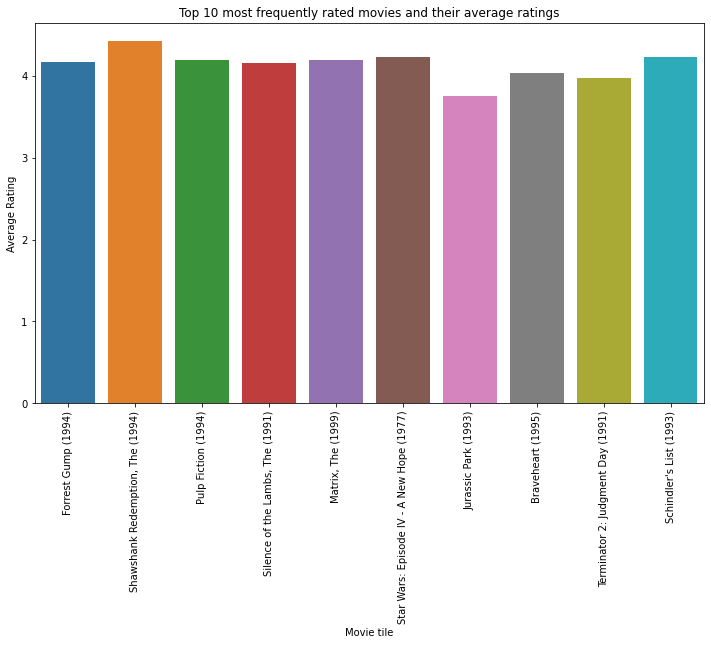

In [10]:
top_10_views = movie_rating_df['title'].value_counts().nlargest(10)
average_ratings = movie_rating_df.groupby('title')['rating'].mean().loc[top_10_views.index]

DataAnalyzer.create_plots(movie_rating_df, 'bar_plot2', average_ratings)

Shawshank Redemption has the highest average rating amongst the most frequently rated movies, followed by Schindler's List and Star Wars Episode IV - A New Hope.

All of the top 10 most frequently movies have average ratings above 3.5, indicating generally favorable reviews.

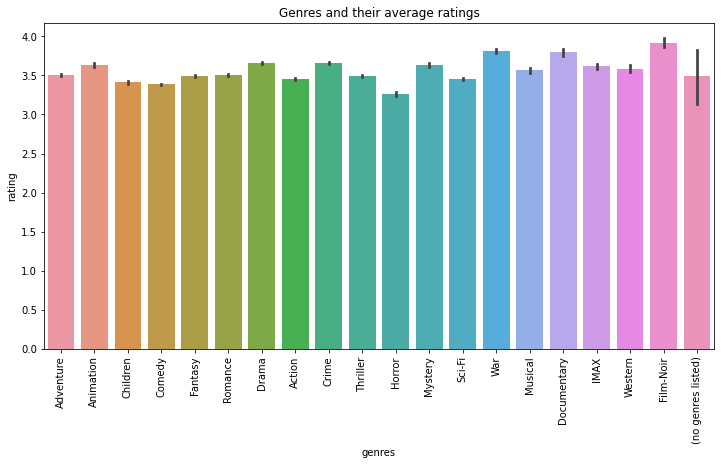

In [11]:
DataAnalyzer.bar_plot('genres', 'rating', exploded_genres_df)

From the bar chart it can be seen that all the genres have an average rating of above 3.

The ratings for the genres is higher in film noir which is stylized Hollywood crime dramas, particularly those that emphasize cynical attitudes and motivations followed by Documentary.


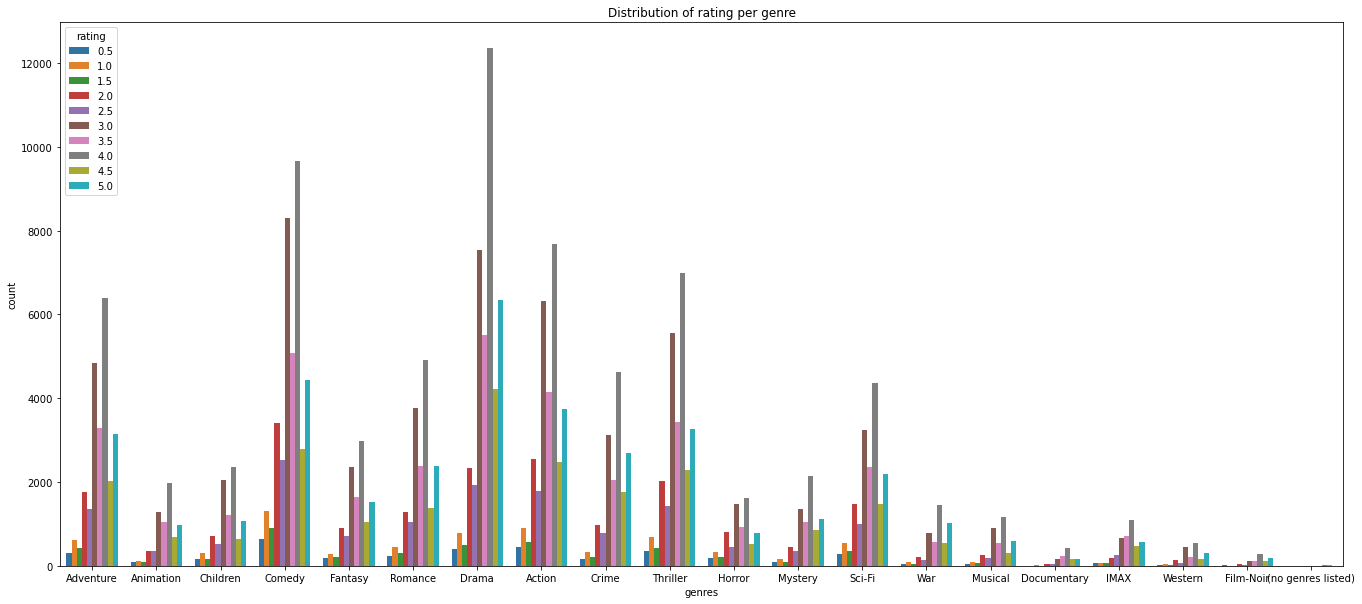

In [12]:
DataAnalyzer.count_plot(exploded_genres_df)

Drama and Comedy genres tend to have a higher concentration of movies with higher ratings, while Documentary and Sci-Fi genres tend to have more movies with lower ratings while also having a relatively higher number of movies with lower ratings.

Drama, Comedy, Action, Thriller and Adventure appear to have the highest count of ratings indicating higher user engagement.

Film Noir, Western and Documentary genres seem to have the lowest count of ratings indicating low user engagement

In [13]:
DataAnalyzer.sort_movie_ratings(movie_rating_df, 'top')

title
Karlson Returns (1970)                               5.0
Winter in Prostokvashino (1984)                      5.0
My Love (2006)                                       5.0
Sorority House Massacre II (1990)                    5.0
Winnie the Pooh and the Day of Concern (1972)        5.0
Sorority House Massacre (1986)                       5.0
Bill Hicks: Revelations (1993)                       5.0
My Man Godfrey (1957)                                5.0
Hellbenders (2012)                                   5.0
In the blue sea, in the white foam. (1984)           5.0
Won't You Be My Neighbor? (2018)                     5.0
Red Sorghum (Hong gao liang) (1987)                  5.0
Love Exposure (Ai No Mukidashi) (2008)               5.0
My Sassy Girl (Yeopgijeogin geunyeo) (2001)          5.0
The Love Bug (1997)                                  5.0
Ballad of Narayama, The (Narayama bushiko) (1983)    5.0
Heidi Fleiss: Hollywood Madam (1995)                 5.0
Louis Theroux: Law & Diso

In [14]:
DataAnalyzer.sort_movie_ratings(movie_rating_df, 'bottom')

title
3 Ninjas Knuckle Up (1995)                            0.5
My Bloody Valentine (1981)                            0.5
3 dev adam (Three Giant Men) (1973)                   0.5
Superfast! (2015)                                     0.5
Crow, The: Wicked Prayer (2005)                       0.5
Survivor (2015)                                       0.5
Mortal Kombat: The Journey Begins (1995)              0.5
Bad Santa 2 (2016)                                    0.5
Cyborg (1989)                                         0.5
Hard Ticket to Hawaii (1987)                          0.5
Baby Boy (2001)                                       0.5
Midnight Chronicles (2009)                            0.5
Haunted House 2, A (2014)                             0.5
Maria Bamford: The Special Special Special! (2012)    0.5
Dead of Night (1945)                                  0.5
The Beast of Hollow Mountain (1956)                   0.5
Follow Me, Boys! (1966)                               0.5
The Butt

## 4. MODELING
The technique used is collaborative filtering which relies on the idea that individuals with similar preferences tend to enjoy similar items or content.

In [15]:
class Modeling:
    def __init__(self, df):
        self.df = df
        
    def training(df):
        # Select the necessary columns from the dataset 
        user_item_df = df[['userId', 'movieId', 'rating']]
        
        # Transform the pandas dataframe into Surprise dataset 
        reader = Reader()
        data = Dataset.load_from_df(user_item_df, reader)

        # Split into train and test sets
        trainset, testset = train_test_split(data, test_size=0.2, random_state=111)
        

        return trainset, testset, data, user_item_df
    def model_creation(approach, trainset, testset):
        if approach == SVD:
            model = approach(n_factors= 50, reg_all=0.05, random_state = 111)
            model.fit(trainset)
            print(f'{approach.__name__} RMSE:', accuracy.rmse(model.test(testset)))
        else:    
            model = approach(sim_options={'name':'pearson', 'user_based':True},  random_state=111)
            model.fit(trainset)
            print(f'{approach.__name__} RMSE:', accuracy.rmse(model.test(testset)))   
    def param_grid_search(model_to_tune, data): 
    
        # Setting relevant parameters for Gridsearch
        grid = {
        'k': [30, 40],   # Number of neighbors
        'sim_options': {
            'name': ['cosine', 'pearson'],  # Similarity measures
            'user_based': [True],  # User-based collaborative filtering
            },
        }
        # Creating a parameter grid search for SVD model
        params = {'n_factors': [20, 50, 100],
         'reg_all': [0.02, 0.05, 0.1],
        #  'n_epochs': [5,10],
        # 'lr_all': [0.002,0.005]
         }

        # Running grid search with the defined parameter grid
        if model_to_tune == SVD:
            grid_search = GridSearchCV(model_to_tune, params,
                                    measures=['rmse'], n_jobs=-1)
        else:
            grid_search = GridSearchCV(model_to_tune, grid,
                                    measures=['rmse'], n_jobs=-1)
        grid_search.fit(data)
        print(f"Best RMSE for {model_to_tune.__name__}: {grid_search.best_score}")
        print(f"Best Hyperparameters for {model_to_tune.__name__}: {grid_search.best_params}")

    def make_evaluation_table(metrics_dict):
        metrics_df = pd.DataFrame(metrics_dict)
        evaluation_table = metrics_df.to_html(index=False)
        return evaluation_table

#     metrics_dict = {
#         'Model': ['KNNBasic', 'KNNBaseline', 'KNNWithMeans', 'SVD'],
#         'RMSE': [0.9721, 0.8790, 0.8995, 0.8709],
#         'RMSE after Tuning': [0.9705, 0.8767, 0.8964, 0.8688],
#         }

    # A function to ask the user to rate movies they have watched
    def movie_rater(movie_df,num, genre=None):
        userID = 1000
        rating_list = []
        genre = input('What movie genre have you watched before?')

        while num > 0:
            if genre:
                movie = movie_df[movie_df['genres'].str.contains(genre)].sample(1)
            else:
                movie = movie_df.sample(1)
            print(movie)
            rating = input('How do you rate this movie on a scale of 1-5, press n if you have not seen :\n')
            if rating == 'n':
                continue
            else:
                rating_one_movie = {'userId':userID,'movieId':movie['movieId'].values[0], 'rating':rating}
                rating_list.append(rating_one_movie) 
                num -= 1
        return rating_list
    
    # A function to rank the movies in the database based on the user's rating on presented movies
    def rank_movies(df, user_rating):
            ## add the new ratings to the original ratings DataFrame
        user_ratings = pd.DataFrame(user_rating)
        string_column = user_ratings.select_dtypes(include=[object]).columns
        for col in string_column:
            user_ratings[col] = pd.to_numeric(user_ratings[col], errors = 'coerce')
        user_ratings = user_ratings.dropna()
        new_ratings_df = pd.concat([df, user_ratings], axis=0)
        reader = Reader()
        new_data = Dataset.load_from_df(new_ratings_df, reader)

        # train a model using the new combined DataFrame
        svd_ = SVD(n_factors= 50, reg_all=0.05)
        svd_.fit(new_data.build_full_trainset())

        # make predictions for the user
        list_of_movies = []
        for m_id in movie_rating_df['movieId'].unique():
            list_of_movies.append( (m_id,svd_.predict(1000,m_id)[3]))
        # Order the predictions from highest to lowest rated
        ranked_movies = sorted(list_of_movies, key=lambda x:x[1], reverse=True)
        return ranked_movies
    
    # A function to recommend movies to the user
    def recommended_movies(user_ratings, movie_title_df, n):
        recommended_movies_set = set()  # Keep track of recommended movies

        for idx, rec in enumerate(user_ratings):
            movie_id = int(rec[0])
            title_array = movie_title_df.loc[movie_title_df['movieId'] == movie_id, 'title'].values

            # Check if the array is not empty and the movie has not been recommended before
            if title_array.any() and title_array[0] not in recommended_movies_set:
                title = title_array[0]
                print('Recommendation #', idx+1, ':', title, '\n')
                recommended_movies_set.add(title)  # Add the movie to the set of recommended movies
                n -= 1

            if n == 0:
                break
    

In [16]:
# Training our dataset
trainset, testset, data, user_item_df = Modeling.training(movie_rating_df)

### MODEL 1: KNN BASIC MODEL

#### Building and Tuning KNN Basic Model

#### Building the KNN Basic Model

In [17]:
Modeling.model_creation(KNNBasic, trainset, testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9721
KNNBasic RMSE: 0.9720846164183417


>* KNNBasic model is built using collaborative filtering.
>* The initial RMSE for KNNBasic is 0.9721.

The initial RMSE (Root Mean Square Error) for the KNNBasic model is 0.9721. 

A lower RMSE value indicates that the model's predictions are closer to the actual observed values, hence indicating better accuracy. In this case, an RMSE of 0.9721 indicates that, on average, the KNNBasic model's predictions are off by approximately 0.9721 units from the actual ratings in the dataset.

It's important to note that the interpretation of RMSE can vary depending on the specific use case and the range of the values being predicted. In the context of recommendation systems, an RMSE of 0.9721 suggests a certain level of accuracy, but further analysis and comparison with other models or baseline methods may be necessary to determine the effectiveness of the KNNBasic model for the specific recommendation task at hand.

#### Tuning the KNNBasic Model

In [18]:
Modeling.param_grid_search(KNNBasic, data)

Best RMSE for KNNBasic: {'rmse': 0.9721431635469813}
Best Hyperparameters for KNNBasic: {'rmse': {'k': 40, 'sim_options': {'name': 'pearson', 'user_based': True}}}


> * Grid search has performed to find optimal hyperparameters for the KNNBasic model.
> * The best hyperparameters include 40 neighbors with cosine similarity for user-based collaborative filtering.
> * The tuned RMSE for KNNBasic is 0.9731, which is slightly worse than the initial model from the build one which was 0.9721 

The situation where the tuned RMSE for the KNNBasic model is slightly worse than the initial RMSE can be attributed to several factors:
1. Impact of hyperparameters
2. Complexity and overfitting
3. Data Variability
4. Randomness
5. Statistical Noise

### MODEL 2: KNNBaseline Model


The KNNBaseline algorithm, extends the functionality of the KNNBasic algorithm by incorporating a baseline prediction into the similarity calculation.

KNNBaseline offers improved accuracy, robustness to sparsity, better handling of biases, and effective mitigation of the cold start problem due to the incorporation of baseline predictions. This makes KNNBaseline a preferred choice in many recommendation system scenarios, particularly when dealing with real-world, sparse, and dynamic datasets.

#### Building The KNNBaseline Model

In [19]:
Modeling.model_creation(KNNBaseline, trainset, testset)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8790
KNNBaseline RMSE: 0.8789611074934803


> The RMSE for KNNBaseline is 0.8790, indicating improved performance compared to KNNBasic.

#### Tuning the KNNBaseline Model

In [20]:
Modeling.param_grid_search(KNNBaseline, data)

Best RMSE for KNNBaseline: {'rmse': 0.8769858628288711}
Best Hyperparameters for KNNBaseline: {'rmse': {'k': 40, 'sim_options': {'name': 'pearson', 'user_based': True}}}


>* Grid search for KNNBaseline is performed to fine-tune hyperparameters.
>* The best hyperparameters include 40 neighbors with cosine similarity for user-based collaborative filtering.
>* The tuned RMSE for KNNBaseline is 0.8762, further improving the model from the baseline build which had 0.8790

### MODEL 3: KNNWithMeans Model

In KNNWithMeans, the collaborative filtering is performed using the k-nearest neighbors approach, where the similarity between users or items is calculated based on their ratings.

Additionally, KNNWithMeanstakes into account the mean ratings of each user or item when making predictions. This means that the model not only considers the similarities between users or items, but also adjusts for the average rating given by each user or received by each item.

This model is useful when there are significant variations in the rating tendencies of different users or items, and it aims to normalize these tendencies when making predictions.

#### Building The KNN WithMeans Model

In [21]:
Modeling.model_creation(KNNWithMeans, trainset, testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8995
KNNWithMeans RMSE: 0.8994971701396823


> * The RMSE for KNNWithMeans is 0.8995, indicating a slightly higher error compared to KNNBaseline. 

#### Tuning The KNN WithMeans Model

In [22]:
Modeling.param_grid_search(KNNWithMeans, data)

Best RMSE for KNNWithMeans: {'rmse': 0.8947632133442498}
Best Hyperparameters for KNNWithMeans: {'rmse': {'k': 40, 'sim_options': {'name': 'pearson', 'user_based': True}}}


>* Grid search is performed to find optimal hyperparameters for the KNNWithMeans model.
>* The best hyperparameters include 40 neighbors with Pearson similarity for user-based collaborative filtering.
>* The tuned RMSE for KNNWithMeans is 0.8967, showing improvement over the initial model which had 0.8995.

### MODEL 4: SVD Model

The Singular Value Decomposition (SVD) model is a widely used collaborative filtering algorithm in recommendation systems. It is based on matrix factorization and has been popularized by winning the Netflix Prize competition.

#### Building The SVD Model

In [23]:
Modeling.model_creation(SVD, trainset, testset)

RMSE: 0.8709
SVD RMSE: 0.8709079093151322


* The RMSE for SVD is 0.8709, demonstrating a competitive performance compared to the collaborative filtering models.

#### Tuning The SVD Model

In [24]:
# Grid search for KNNWithMeans Model
Modeling.param_grid_search(SVD, data)

Best RMSE for SVD: {'rmse': 0.8685908413774228}
Best Hyperparameters for SVD: {'rmse': {'n_factors': 100, 'reg_all': 0.05}}


* Grid search is performed to find optimal hyperparameters for the SVD model.
* The best hyperparameters include 50 factors and a regularization term of 0.05.
* The tuned RMSE for SVD is 0.8682, slightly improving the model.

### FINAL MODEL SELECTION AND EVALUATION

The tuned SVD model performed best as compared to the rest of the models with a RMSE of 0.8682. This means that, on average, the predicted ratings are about 0.8688 units away from the actual ratings. 

In [25]:
metrics_dict = {
        'Model': ['KNNBasic', 'KNNBaseline', 'KNNWithMeans', 'SVD'],
        'RMSE': [0.9721, 0.8790, 0.8995, 0.8709],
        'RMSE after Tuning': [0.9705, 0.8767, 0.8964, 0.8688],
        }
evaluation_table = Modeling.make_evaluation_table(metrics_dict)
HTML(evaluation_table)

>* An evaluation table is created, summarizing the RMSE for each model before and after tuning.
>* The SVD model stands out as the best-performing model with the lowest RMSE of 0.8688.
>* It is therefore necessary to select the SVD Model due to its performance

### Final Model Selection and Fitting

In [26]:
# Final model selected
final_model = SVD(n_factors= 50, reg_all=0.05, random_state=111)
final_model.fit(trainset)

### PREDICTIONS

#### Movie Rater Function 

In [30]:
# Run the movie_rater function and assign it to user_rating
user_rating = Modeling.movie_rater(exploded_genres_df[['movieId', 'title','genres']], 2)

What movie genre have you watched before?Action
       movieId                                              title  genres
49785     2951  Fistful of Dollars, A (Per un pugno di dollari...  Action
How do you rate this movie on a scale of 1-5, press n if you have not seen :
n
       movieId                 title  genres
31216     1391  Mars Attacks! (1996)  Action
How do you rate this movie on a scale of 1-5, press n if you have not seen :
n
       movieId               title  genres
45278     2571  Matrix, The (1999)  Action
How do you rate this movie on a scale of 1-5, press n if you have not seen :
n
       movieId          title  genres
40887     2193  Willow (1988)  Action
How do you rate this movie on a scale of 1-5, press n if you have not seen :
n
       movieId                title  genres
51601     3104  Midnight Run (1988)  Action
How do you rate this movie on a scale of 1-5, press n if you have not seen :
n
       movieId         title  genres
92480    84944  Rango (2011)  Ac

> * The movie_rater function prompts the user to input a specific movie genre that he/she has watched before. The user is then presented with two movies to rate on a scale of 1 - 5 based on their liking of the movie. 

### Generating Recommended Movies

In [31]:
# Run the rank_movies function
ranked_m_ovies = Modeling.rank_movies(user_item_df, user_rating)

# run the recommender function
Modeling.recommended_movies(ranked_m_ovies, movie_rating_df, 5)

Recommendation # 1 : Philadelphia Story, The (1940) 

Recommendation # 2 : Lawrence of Arabia (1962) 

Recommendation # 3 : Guess Who's Coming to Dinner (1967) 

Recommendation # 4 : Casablanca (1942) 

Recommendation # 5 : High Noon (1952) 



> * The user's  ratings are used to make predictions for this new user.
> * The recommended_movies function is used to display top 5 movie recommendations based on the user's preferences and new ratings made using the movie_rater function


### Deployment Code

In [ ]:
import streamlit as st
import pandas as pd
import pickle 
import requests
import numpy as np

###
movie_rating_df = pd.read_csv('ml-latest-small/movie_rating_df.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')
movies = movies.sample(frac=1, random_state=42).reset_index(drop=True)



# movie = movies[movies['genres'].str.contains('Adventure')].sample(1)
# print(movie)

movie_mapper = dict(zip(movies['title'], movies.index))
user_item_df = movie_rating_df[['userId', 'movieId', 'rating']]
ratings = [1,2,3,4,5,'n']
genres = ['Adventure',
         'Animation',
         'Children',
         'Comedy',
         'Fantasy',
         'Romance',
         'Drama',
         'Action',
         'Crime',
         'Thriller',
         'Horror',
         'Mystery',
         'Sci-Fi',
         'War',
         'Musical',
         'Documentary',
         'IMAX',
         'Western',
         'Film-Noir',
         '(no genres listed)']
content_matrix = pickle.load(open('content_matrix.sav','rb'))
from sklearn.metrics.pairwise import cosine_similarity

def get_movie_recommendations(movie, n):

    M_idx = movie_mapper[movie]
    # print('Movie Index: ',M_idx)
    movie_index = content_matrix[M_idx]
    # print('Index: ', type(movie_index))
    scores = cosine_similarity(movie_index, content_matrix)
    scores = scores.flatten()
    print('Scores: ',scores)

    recommended_indices = (-scores).argsort()[1:n+1]
    print("Rec: ",recommended_indices)
    return movies['title'].iloc[recommended_indices],movies['movieId'].iloc[recommended_indices]
##
def fetch_poster(movie_id):
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key=e62e106a7409881e60db5a8aaa58e0a5&language=en-US'.format(movie_id))
    data = response.json()
    st.text(data)
    return "https://image.tmdb.org/t/p/w500" + data['poster_path']

st.title('Filamu Movie Recommender')

selected_movie_name = st.selectbox("Which movie is similar to what you'd wanna watch?",movies['title'].values)
if st.button('Search'):
    names, indices = get_movie_recommendations(selected_movie_name, 10)
    for name,id in zip(names, indices):
        # st.text(id)
        # st.table(name)
        st.text(name)
        # st.text(name)
        # st.image(fetch_poster(id))
    # for name in names:
    #     for id in idx:
    #         st.image(fetch_poster(id))
    #         st.text(name)

## Conclusions

The users are generally generous with their ratings as a majority of the rating are above 3.0. The most frequent rating was a rating of 4.0 with a bit over 25,000 movies.

The second most frequent rating was 3.0 with about 20,000 movies.

The least most common rating was 0.5

The count plot above shows the most viewed movie titles. The top 3 movies are:
Forrest Gump(1994),The Shawshank Redemption(1994) and Pulp Fiction(1994)

The bar plot shows the distribution of all the movie genres in the dataset. The 3 top genres are listed below starting from the most common one:Drama,Comedy and Action

The bar graph above shows the top 10 most viewed movies and there average ratings. The average ratings range from 3.5 to 4.5 for the top 10 movies.

From the bar chart it can be seen that all the genres have an average rating of above 3. Film Noir has the highest average rating followed by Documentary.

All the genres have most of their movies rated 4.0, with relatively fewer users giving a rating of either 1 and 2 to the movies.

Drama, Comedy, Action, Thriller and Adventure appear to have the highest count of ratings indicating higher user engagement.

Film Noir, Western and Documentary genres seem to have the lowest count of ratings indicating low user engagement
Grid search was performed to find optimal hyperparameters for the KNNBasic model.

The best hyperparameters include 40 neighbors with cosine similarity for user-based collaborative filtering.

The tuned RMSE for KNNBasic is 0.9724, which is slightly worse than the initial model from the build one which was 0.9721 

Grid search for KNNBaseline is performed to fine-tune hyperparameters.

The best hyperparameters include 30 neighbors with cosine similarity for user-based collaborative filtering.

The tuned RMSE for KNNBaseline is 0.8779, further improving the model from the baseline build which had 0.8790
Grid search is performed to find optimal hyperparameters for the KNNWithMeans model.

The best hyperparameters include 40 neighbors with Pearson similarity for user-based collaborative filtering.

The tuned RMSE for KNNWithMeans is 0.8953, showing improvement over the initial model which had 0.8995.

Grid search is performed to find optimal hyperparameters for the SVD model.

The best hyperparameters include 100 n-factors and a regularization term of 0.05.

The RMSE for the tuned SVD is 0.8691, slightly improving the model.


## Recommendations

Filamu should consider displaying the following movies as the most popular films in the their database: Forrest Gump(1994), Hoop Dreams(1994), Pulp Fiction(1994)

Filamu should consider having more movies in the following four genres: Drama, Comedy, Action and Thriller, since they are the most popular. 

When deployed, the developed recommendation system will assist Filamu in suggesting films that users might like. This is due to the fact that the system will display to the users films similar to those they have already watched and enjoyed, as well as films that like users have enjoyed.




## Next Steps

Continuously monitor and retrain the deployed model with new data to ensure consistent predictive quality in real-world scenarios.

Enhance scalability by implementing distributed computing frameworks like Spark to handle large datasets more efficiently.

Create more comprehensive user and item profiles by incorporating features such as descriptions, demographics, and historical behavior.

